In [1]:
import tensorflow as tf
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pylab import rcParams

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from functions_for_project import *

In [2]:
BF_BTCUSD = pd.read_csv('btcusd-1m-bitfinex.csv')
BN_BTCUSD = pd.read_csv('BTCUSDT-1m-binance.csv')
BM_BTCUSD = pd.read_csv('XBTUSD-1m-bitmex.csv')

In [8]:
event_time = pd.to_datetime('2019-4-09 23:59:00')
starting_date = pd.to_datetime('2018-8-09 00:00:00')
ending_date = pd.to_datetime('2019-5-08 00:00:00')
BF_BN,BN = format_both_df(BF_BTCUSD,BN_BTCUSD,event_time,starting_date,ending_date)
BF_BM,BM = format_both_df(BF_BTCUSD,BM_BTCUSD,event_time,starting_date,ending_date)

C:\Users\Jane\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\Jane\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


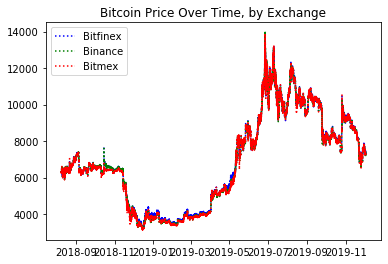

In [4]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(BF_BN.timestamp,BF_BN.close,c='b',ls=':',label='Bitfinex')
ax.plot(BN.timestamp,BN.close,c='g',ls=':',label='Binance')
ax.plot(BM.timestamp,BM.close,c='r',ls=':',label='Bitmex')
ax.title.set_text('Bitcoin Price Over Time, by Exchange')
plt.legend(loc=2)
plt.draw()
fig.savefig('exchange_prices_BTC.png')

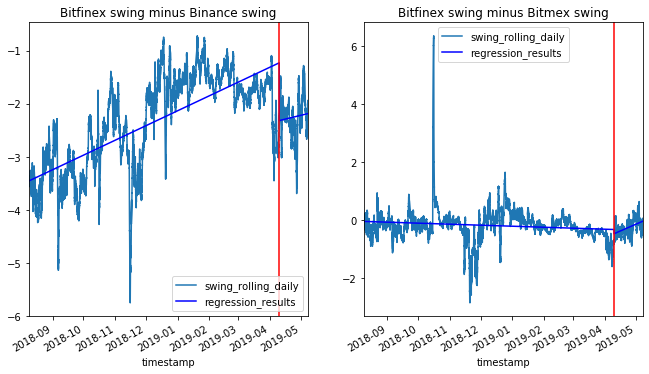

In [9]:
graph_both(BF_BN,BF_BM,event_time,'Bitfinex swing minus Binance swing','Bitfinex swing minus Bitmex swing')

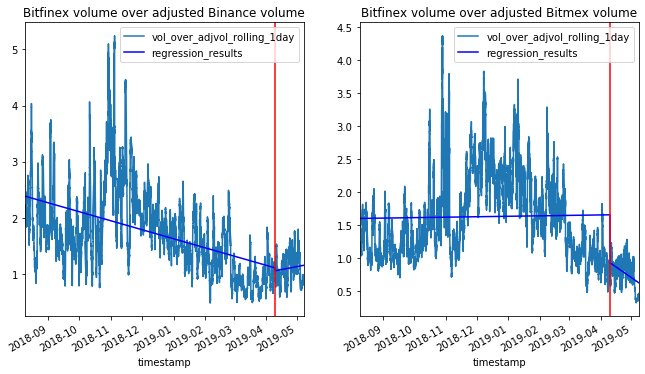

In [10]:
graph_both(BF_BN,BF_BM,event_time,'Bitfinex volume over adjusted Binance volume','Bitfinex volume over adjusted Bitmex volume',graph_using_volume = True)

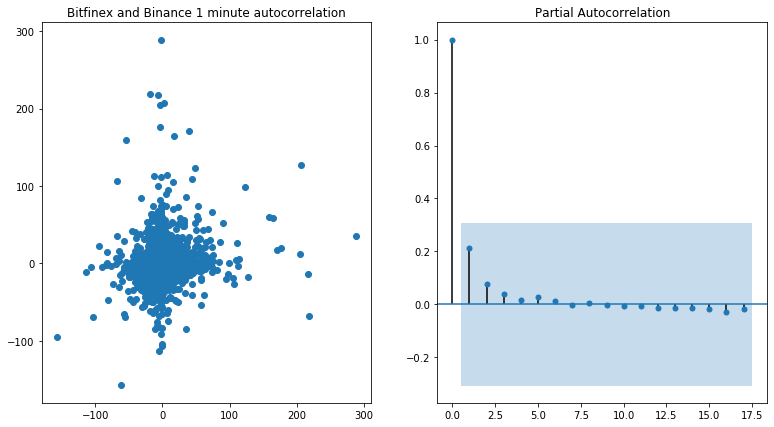

Bitfinex and Binance F-test value: 1.0172137732856057
Bitfinex and Binance bartlett test for equal variances, p value: 0.022377479863592474
Bitfinex and Binance levene test for equal variances, p value: 1.6049642097960988e-08


In [11]:
variance_testing(BF_BN,"Bitfinex and Binance")

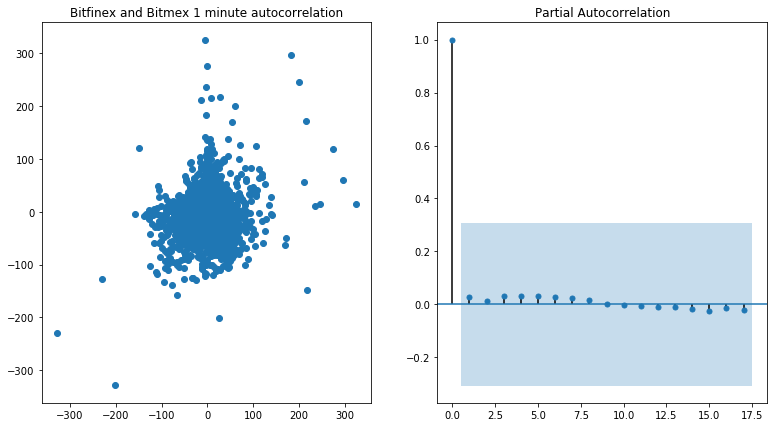

Bitfinex and Bitmex F-test value: 0.9703664400031898
Bitfinex and Bitmex bartlett test for equal variances, p value: 6.5274624617562e-05
Bitfinex and Bitmex levene test for equal variances, p value: 1.697018849541566e-07


In [12]:
variance_testing(BF_BM,"Bitfinex and Bitmex")